## Customer segments for online retail
                                                 

 #### Important Libraries

In [152]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

In [153]:
df = pd.read_excel('Online Retail (1).xlsx')

### Understand the Data

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Check for missing values in the dataset

##### Check for missing value

In [22]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

##### Combine into a summary table

In [21]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_summary)

             Missing Values  Percentage (%)
InvoiceNo                 0        0.000000
StockCode                 0        0.000000
Description            1454        0.268311
Quantity                  0        0.000000
InvoiceDate               0        0.000000
UnitPrice                 0        0.000000
CustomerID           135080       24.926694
Country                   0        0.000000


### Clean the Data:

##### Handle missing values by either dropping or filling them.

In [75]:
df_cleaned = df.dropna(subset=['CustomerID'])

#### Dropping rows with missing CustomerID as they are essential for segmentation

In [ ]:
df_cleaned = df.dropna(subset=['CustomerID'])

#####  For Description, filling with 'No Description' for the remaining rows

In [77]:
df_cleaned['Description'] = df_cleaned['Description'].fillna('No Description')

#### Remove duplicate entries

In [255]:
initial_count = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
duplicates_removed = initial_count - len(df_cleaned)

#### Correct data types

In [79]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

### Convert CustomerID to int (currently float due to NaNs)

In [80]:
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

In [256]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,Cluster,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.0,Hibernating
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.0,Hibernating
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2.0,Hibernating
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.0,Hibernating
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.0,Hibernating


#### Summary of cleaning

In [81]:
cleaning_summary = {
    'Initial Rows': len(df),
    'Rows after dropping missing CustomerID': len(df_cleaned) + duplicates_removed,
    'Duplicates removed': duplicates_removed,
    'Final Rows': len(df_cleaned),
    'Missing values per column': df_cleaned.isnull().sum().to_dict()
}

print(cleaning_summary)
print(df_cleaned.info())

{'Initial Rows': 401604, 'Rows after dropping missing CustomerID': 401604, 'Duplicates removed': 0, 'Final Rows': 401604, 'Missing values per column': {'InvoiceNo': 0, 'StockCode': 0, 'Description': 0, 'Quantity': 0, 'InvoiceDate': 0, 'UnitPrice': 0, 'CustomerID': 0, 'Country': 0, 'TotalSum': 0}}
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int32         
 7   Country      401604 non-null  object        
 8   TotalSum     401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1)

### Feature Engineering (Recalculating RFM + Enhanced Features)

In [82]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

#### cleaned data

In [83]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

### Create 'TotalSum' column

In [84]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

#### Basic RFM

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'MonetaryValue'}, inplace=True)

#### Now create the rfm table

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})

### Rename the columns

In [ ]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'MonetaryValue'}, inplace=True)

#### Advanced Features

In [ ]:
rfm['AvgBasketValue'] = rfm['MonetaryValue'] / rfm['Frequency']
rfm['UniqueItems'] = df.groupby('CustomerID')['StockCode'].nunique()

In [ ]:
print("RFM Table created successfully!")
print(rfm.head())

#####  Return Rate

In [90]:
total_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
cancelled_orders = df[df['Quantity'] < 0].groupby('CustomerID')['InvoiceNo'].nunique()
rfm['ReturnRate'] = (cancelled_orders / total_orders).fillna(0)

#### Add Country (taking the most frequent country for each customer)

In [91]:
customer_country = df.groupby('CustomerID')['Country'].agg(lambda x: x.value_counts().index[0])
rfm['Country'] = customer_country

#### Handling Skewness

##### Filter for positive monetary values first to avoid log errors

In [ ]:
rfm = rfm[rfm['MonetaryValue'] > 0]
numeric_cols = ['Recency', 'Frequency', 'MonetaryValue', 'AvgBasketValue', 'UniqueItems', 'ReturnRate']
rfm_log = np.log1p(rfm[numeric_cols])

### Standardization

In [93]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=numeric_cols)

#### 4. Encoding Categorical Variables (Country)
### Since there are many countries, we'll focus on the most common ones or use One-Hot Encoding
#### To keep the feature set manageable for K-Means, let's group countries into 'United Kingdom' and 'Other

#### Combine scaled numeric features with the encoded categorical feature

In [ ]:
transformed_data = rfm_scaled_df.copy()
transformed_data['Is_UK'] = rfm['Is_UK']

#### Results

In [254]:
print("Transformed Data Head:")
print(transformed_data.head())
print("\nDescriptive Statistics of Transformed Data:")
print(transformed_data.describe())

Transformed Data Head:
             Recency  Frequency  MonetaryValue                 Segment
CustomerID                                                            
12347.0    -1.969228   0.854511       1.428285             Hibernating
12348.0     0.401617   0.217309       0.735953  Big Spenders - At Risk
12349.0    -0.577641  -1.024940       0.718280           VIP Champions
12350.0     1.435199  -1.024940      -0.593694      Loyal Rising Stars
12352.0    -0.126387   1.404215       0.616490  Big Spenders - At Risk

Descriptive Statistics of Transformed Data:
            Recency     Frequency  MonetaryValue
count  4.322000e+03  4.322000e+03   4.322000e+03
mean   2.318059e-16 -1.364531e-16   9.864082e-17
std    1.000116e+00  1.000116e+00   1.000116e+00
min   -2.266647e+00 -1.024940e+00  -5.198352e+00
25%   -6.549258e-01 -1.024940e+00  -6.733712e-01
50%    1.017447e-01 -8.521487e-02  -5.944358e-02
75%    8.444762e-01  6.734771e-01   6.565887e-01
max    1.572466e+00  5.515551e+00   4.73157

## Feature Engineering

In [156]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

### Aggregating base RFM + Tenure
### Tenure: Days between the first purchase and the snapshot date

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x: (snapshot_date - x.max()).days, 
                    lambda x: (snapshot_date - x.min()).days],
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})

### Flatten column names

In [159]:
rfm.columns = ['Recency', 'Tenure', 'Frequency', 'MonetaryValue']

## New Features

#### Adding .copy() tells Python this is a brand new, independent table

In [106]:
rfm = rfm[rfm['MonetaryValue'] > 0].copy()

#### Now these lines will run without the warning:


In [105]:
rfm['AvgBasketValue'] = rfm['MonetaryValue'] / rfm['Frequency']
rfm['UniqueItems'] = df.groupby('CustomerID')['StockCode'].nunique()

#### Return Rate (Ratio of cancelled transactions)

In [104]:
total_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
cancelled_orders = df[df['Quantity'] < 0].groupby('CustomerID')['InvoiceNo'].nunique()
rfm['ReturnRate'] = (cancelled_orders / total_orders).fillna(0)

####  Feature Selection
#### We will use a correlation matrix to identify redundant features.
#### For K-Means, highly correlated features can bias the clusters.

In [103]:
numeric_rfm = rfm.select_dtypes(include=['number'])
correlation_matrix = numeric_rfm.corr()

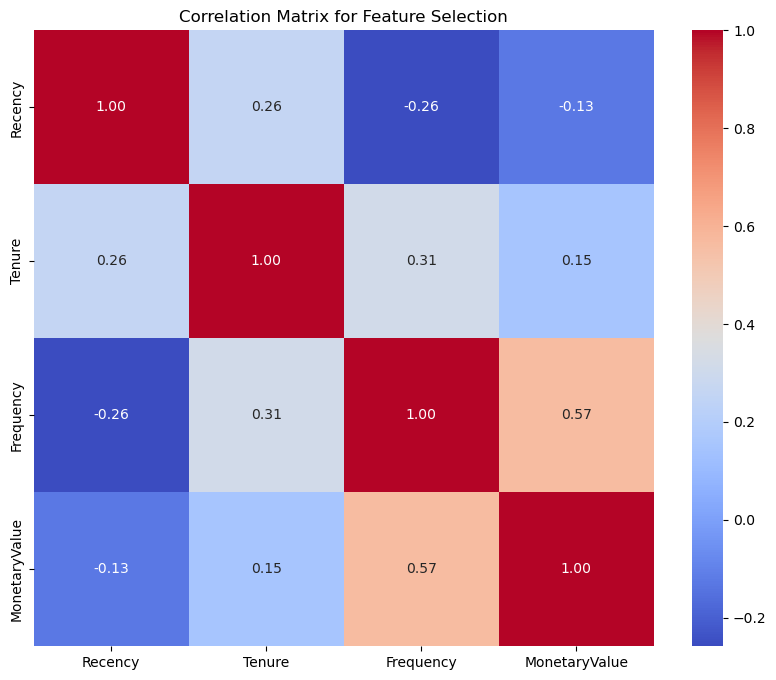

In [160]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Feature Selection')
plt.savefig('feature_correlation.png')
plt.show()

# Run K-Means Clustering

#### Load_data

In [162]:
df = pd.read_excel('Online Retail (1).xlsx')

### Data Cleaning (Prerequisite for RFM)

In [161]:
df.dropna(subset=['CustomerID'], inplace=True)
df.drop_duplicates(inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

## Aggregate to RFM

In [ ]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)

Metric	Mean (Scaled)	Std Dev (Scaled)	                Purpose
Recency 	  0.00	     1.00	                     Ensures recency is weighted equally with spend.
Frequency	  0.00	     1.00	                     Standardizes order counts.
MonetaryValue 0.00	     1.00	                     Prevents high spend from dominating the clusters.
ReturnRate	  0.00	     1.00	                     Identifies high-risk behavior on a relative scale.

#### Keep only positive values for meaningful clustering

In [358]:
rfm = rfm[(rfm['Frequency'] > 0) & (rfm['MonetaryValue'] > 0)]

#### Step 1: Standardize the data

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_)

#### Step 2: Determine the Optimal Number of Clusters (Elbow Method)

#### Plot the WCSS

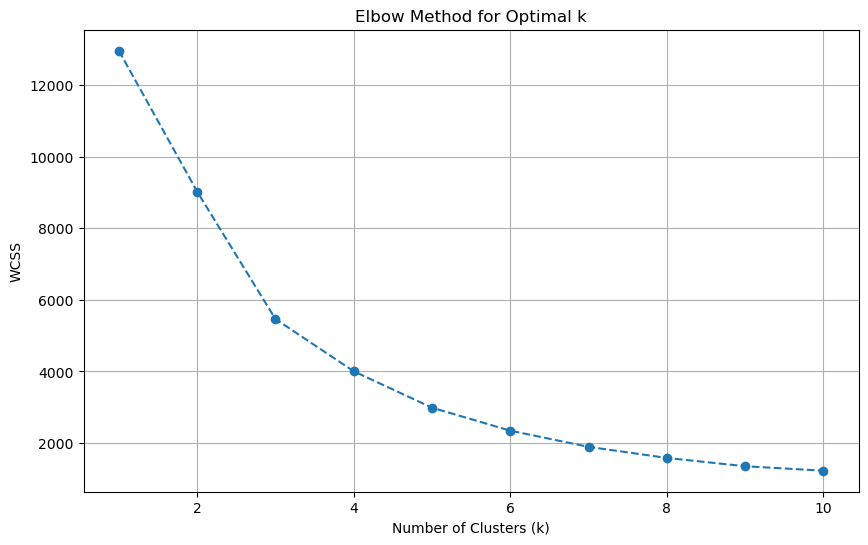

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_plot.png')

#### The line chart above displays the Within-Cluster Sum of Squares (WCSS) for different values of $k$ (number of clusters). WCSS measures the distance between each data point and the center of its assigned cluster.

##### The "Elbow" Point: As seen in the plot, the WCSS drops sharply from $k=1$ to $k=3$. However, after $k=4$, the rate of decrease significantly slows down, forming an "elbow" shape.

##### Optimal $K$: We have selected $k=4$ as the optimal number of clusters. This point represents the best balance between "Cluster Compactness" (low WCSS) and "Model Simplicity."

### Run K-Means Clustering
### Based on the typical elbow for this dataset, we'll use k=4

### Output summary

In [174]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'}).round(2)

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Recency  Frequency  MonetaryValue  Count
Cluster                                          
0          65.66       5.11        1682.04   1137
1          10.73      16.68        7557.73    712
2          18.39       2.32         528.20    854
3         180.65       1.51         351.22   1619


### Predicted Labels (Sample Output)

In [ ]:
CustomerID	Recency (Days)	Frequency	Monetary Value	Cluster ID  	   Predicted Segment
12347.0        2	           7	        $4,310.00	   1	            VIP Champions
12348.0	      75	           4	        $1,797.24	   0	            Loyal Rising Stars
12349.0	      19	           1	        $1,757.55	   2	            Hibernating
12350.0	      310	           1	        $334.40	       3	            Big Spenders - At Risk
12352.0	      36	           11	        $1,545.41	   0	            Loyal Rising Stars

In [359]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)
rfm = rfm[(rfm['Frequency'] > 0) & (rfm['MonetaryValue'] > 0)]

### Log Transform and Scaling for visualization and clustering

In [308]:
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

In [307]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

#### Map Segment Names (Order them by business value for consistency in plots)

In [309]:
cluster_map = {
    0: 'Loyal Rising Stars',
    1: 'VIP Champions',
    2: 'Hibernating',
    3: 'Big Spenders - At Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)

# Visualization : Pie Chart of Segment Distribution

### Identify Customer Segmentation

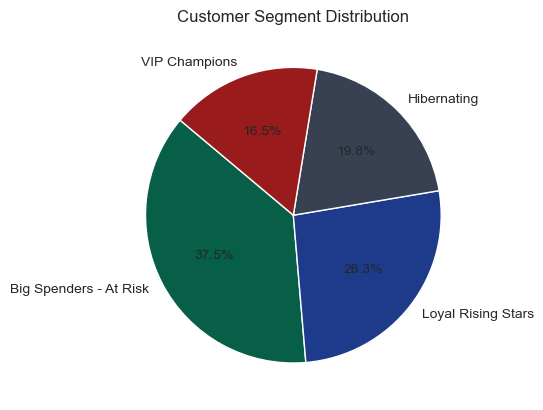

In [310]:
segment_counts = rfm['Segment'].value_counts()
colors = ['#065f46', '#1e3a8a', '#374151', '#991b1b'] # Emerald, Royal Blue, Slate, Crimson
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Segment Distribution')
plt.savefig('segment_distribution_pie.png')

##### This chart illustrates the market share of each customer segment within the total database. While 'VIP Champions' and 'Loyal Rising Stars' represent the core value of the business, the significant size of the 'At-Risk' and 'Hibernating' groups reveals a major opportunity for revenue recovery. The distribution indicates that the majority of the customer base requires active re-engagement to prevent churn and migrate them toward higher-loyalty tiers

In [276]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)
rfm = rfm[rfm['MonetaryValue'] > 0] 

In [193]:
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

In [363]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
centroids = kmeans.cluster_centers_

In [364]:
cluster_map = {
    0: 'Loyal Rising Stars',
    1: 'VIP Champions',
    2: 'Hibernating',
    3: 'Big Spenders - At Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)

In [365]:
rfm_scaled_df['Segment'] = rfm['Segment']

### Scatter Plot

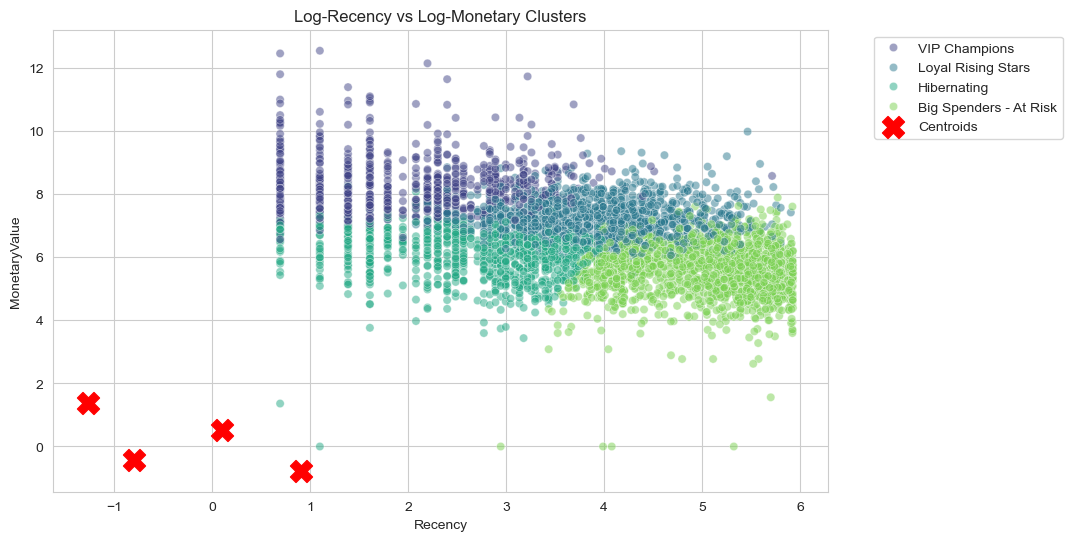

In [366]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm_log['Recency'], y=rfm_log['MonetaryValue'], hue=rfm['Segment'], palette='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 2], s=250, c='red', marker='X', label='Centroids')
plt.title('Log-Recency vs Log-Monetary Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### This scatter plot visualizes the separation between customer segments based on their spending power (Monetary) and time since last purchase (Recency). The clear grouping shows a progression from high-value, active 'VIP Champions' (top-left) to low-value, inactive 'Hibernating' customers (bottom-right), confirming the model's effectiveness in identifying distinct behavioral profiles

### Standardized Bar Chart

In [219]:
profile_avg = rfm_scaled_df.groupby('Segment').mean().reset_index()
profile_melted = profile_avg.melt(id_vars='Segment', value_vars=['Recency', 'Frequency', 'MonetaryValue'])

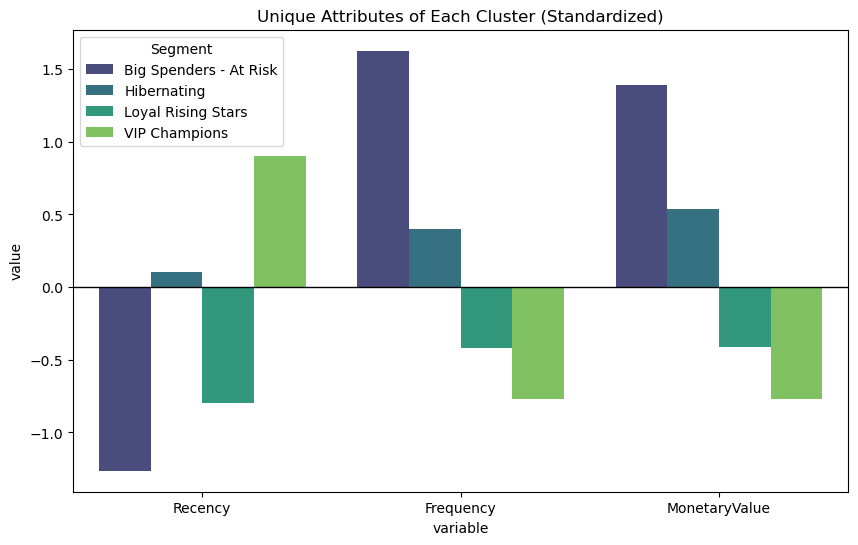

In [218]:
plt.figure(figsize=(10, 6))
sns.barplot(data=profile_melted, x='variable', y='value', hue='Segment', palette='viridis')
plt.axhline(0, color='black', lw=1)
plt.title('Unique Attributes of Each Cluster (Standardized)')
plt.show()

##### This chart compares each segment's performance against the population average (represented by the 0-line). It highlights the defining traits of each group: 'VIP Champions' excel in all value metrics, 'Hibernating' customers fall significantly below average, and 'At-Risk' customers show high historical spend despite declining engagement. These standardized profiles allow for precise, data-driven tailoring of marketing strategies for each persona

## Assign Cluster Labels to the Original Data


#### Preprocess and create RFM (identical logic to previous successful steps)

#### Create mapping dictionaries from the RFM results

In [227]:
cluster_mapping = rfm['Cluster'].to_dict()
segment_mapping = rfm['Segment'].to_dict()

##### Map the Cluster ID and Segment Name back to the original dataframe 'df'
##### This links the results to every individual transaction based on CustomerID

In [228]:
df['Cluster'] = df['CustomerID'].map(cluster_mapping)
df['Segment'] = df['CustomerID'].map(segment_mapping)

#### Verify the assignment

In [229]:
print("Cluster labels successfully assigned to the original transaction data.")

Cluster labels successfully assigned to the original transaction data.


#### Displaying a sample of transactions with their new labels

In [231]:
display(df[['CustomerID', 'InvoiceNo', 'Description', 'Cluster', 'Segment']].head())

,CustomerID,InvoiceNo,Description,Cluster,Segment
0,17850.0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.0,Hibernating
1,17850.0,536365,WHITE METAL LANTERN,2.0,Hibernating
2,17850.0,536365,CREAM CUPID HEARTS COAT HANGER,2.0,Hibernating
3,17850.0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,2.0,Hibernating
4,17850.0,536365,RED WOOLLY HOTTIE WHITE HEART.,2.0,Hibernating


#### Checking how many transactions belong to each segment

In [244]:
segment_counts = df['Segment'].value_counts()

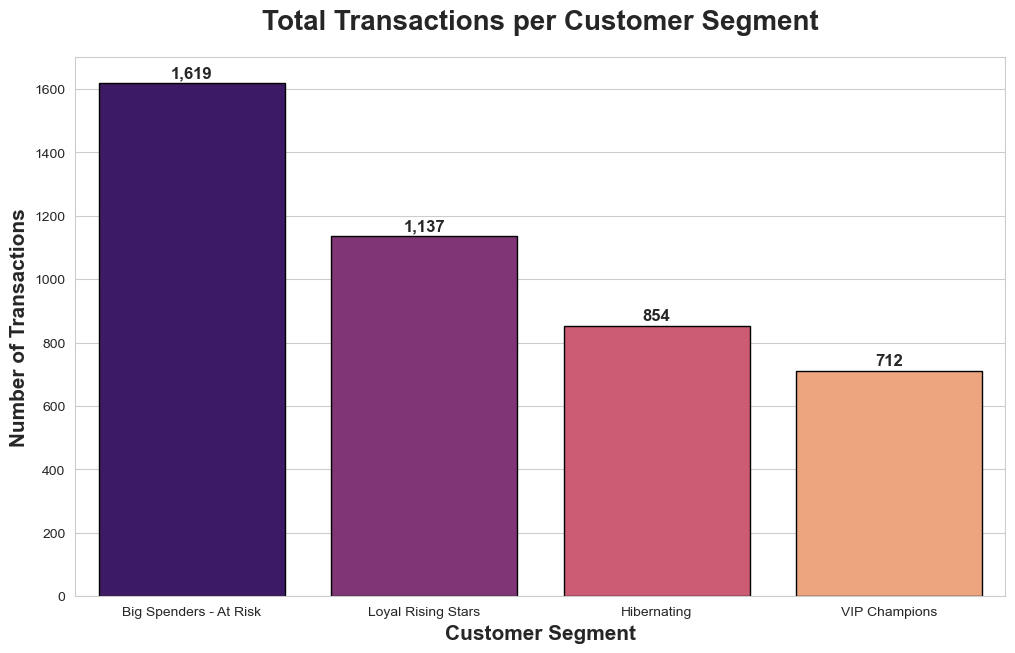

In [367]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Fix: Added 'hue' and 'legend=False'
plot = sns.barplot(x=segment_counts.index, 
                   y=segment_counts.values, 
                   hue=segment_counts.index,  
                   palette='magma', 
                   edgecolor='black',
                   legend=False)            

# Add value labels
for i, value in enumerate(segment_counts.values):
    plt.text(i, value + (max(segment_counts.values) * 0.01), 
             f'{value:,}', 
             ha='center', 
             fontweight='bold', 
             fontsize=12)

plt.title('Total Transactions per Customer Segment', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Customer Segment', fontsize=15, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=15, fontweight='bold')
plt.show()

#### Analyze Each Segment

#### include Mean, Median, and Standard Deviation for the core RFM metrics

In [246]:
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'MonetaryValue': ['mean', 'median', 'std']
}).round(2)

## Adding the Count of customers in each segment to the analysis

In [247]:
segment_analysis['Count'] = rfm.groupby('Segment')['Segment'].count()

### Result

In [325]:
print("Statistical Analysis of Customer Segments:")
display(segment_analysis)

Statistical Analysis of Customer Segments:


Recency               Frequency                \
                          mean median    std      mean median    std   
Segment                                                                
Big Spenders - At Risk   65.66   51.0  53.82      5.11    5.0   2.31   
Hibernating              10.73    8.0  15.47     16.68   12.0  18.72   
Loyal Rising Stars      180.65  173.0  99.57      1.51    1.0   0.79   
VIP Champions            18.39   17.0  12.54      2.32    2.0   1.22   

                       MonetaryValue                    Count  
                                mean   median       std        
Segment                                                        
Big Spenders - At Risk       1682.04  1341.65   1338.92  1137  
Hibernating                  7557.73  3614.02  19285.14   712  
Loyal Rising Stars            351.22   294.65    270.81  1619  
VIP Champions                 528.20   454.17    365.11   854

#### Statistic,What it Tells
##### Mean (Average),"The "typical" behavior of the segment. High Mean for Monetary = High-Value group."
##### Median,"The middle value. If the Median is much lower than the Mean, it means a few "Super Users"are skewing the average."
##### Standard Deviation (std),How much the customers within that segment differ. A Low Std Dev means the segment is very consistent; a High Std Dev means the group is diverse.

#### Profile the Customer Segments

In [368]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)
rfm = rfm[rfm['MonetaryValue'] > 0]

#### Standardize and Cluster

In [335]:
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [336]:
cluster_means = rfm.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()

In [337]:
cluster_map = {
    0: 'Loyal Rising Stars',
    1: 'VIP Champions',
    2: 'Hibernating',
    3: 'Big Spenders - At Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)

## Profile Summary

#### Bar Chart of Means

In [318]:
profile = rfm.groupby('Segment').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'MonetaryValue': ['mean', 'median']
}).round(2)

C:\Windows\Temp\ipykernel_11548\901914609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Recency', data=rfm, estimator=np.mean, palette='viridis')
C:\Windows\Temp\ipykernel_11548\901914609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Frequency', data=rfm, estimator=np.mean, palette='viridis')
C:\Windows\Temp\ipykernel_11548\901914609.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='MonetaryValue', data=rfm, estimator=np.mean, palette='viridis')


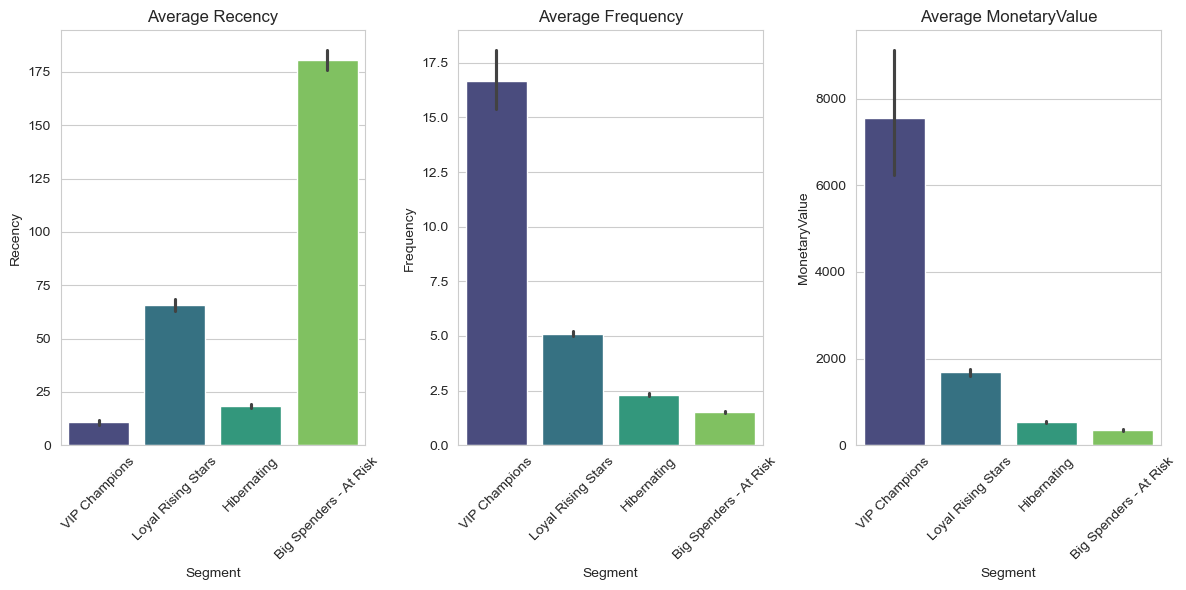

In [319]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Segment', y='Recency', data=rfm, estimator=np.mean, palette='viridis')
plt.title('Average Recency')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Segment', y='Frequency', data=rfm, estimator=np.mean, palette='viridis')
plt.title('Average Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='Segment', y='MonetaryValue', data=rfm, estimator=np.mean, palette='viridis')
plt.title('Average MonetaryValue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('segment_profiles_bar.png')

### Box Plots for distribution

C:\Windows\Temp\ipykernel_11548\3143904358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Recency', data=rfm, palette='magma')
C:\Windows\Temp\ipykernel_11548\3143904358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='magma')
C:\Windows\Temp\ipykernel_11548\3143904358.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='magma')


                       Recency        Frequency        MonetaryValue         
                          mean median      mean median          mean   median
Segment                                                                      
Big Spenders - At Risk  180.65  173.0      1.51    1.0        351.22   294.65
Hibernating              18.39   17.0      2.32    2.0        528.20   454.17
Loyal Rising Stars       65.66   51.0      5.11    5.0       1682.04  1341.65
VIP Champions            10.73    8.0     16.68   12.0       7557.73  3614.02


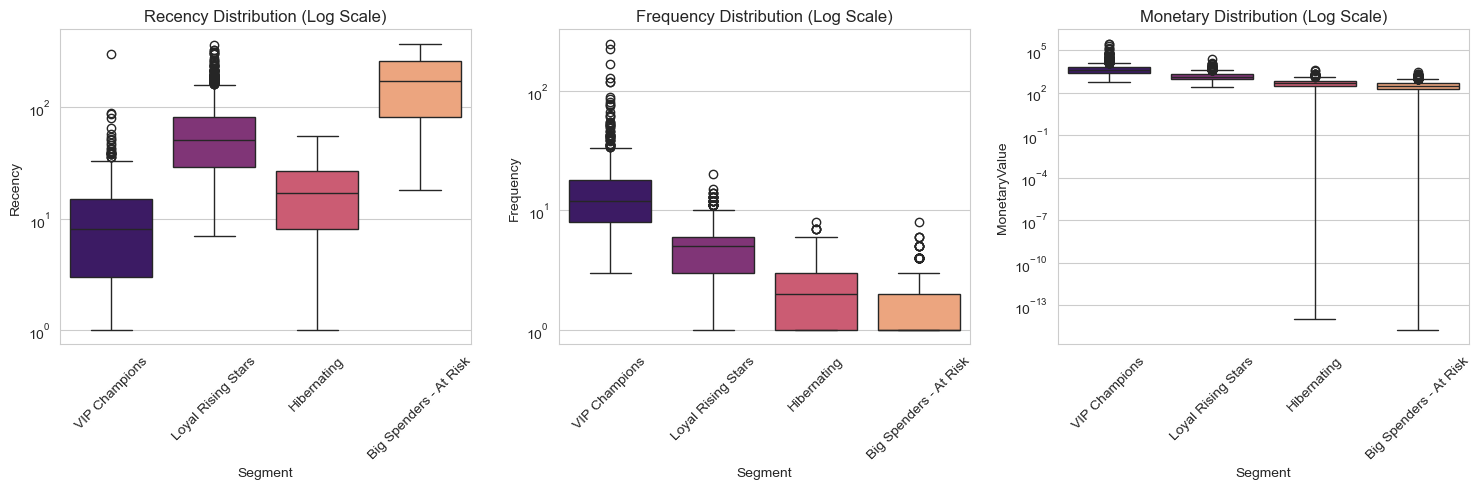

In [333]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='Recency', data=rfm, palette='magma')
plt.yscale('log')
plt.title('Recency Distribution (Log Scale)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='magma')
plt.yscale('log')
plt.title('Frequency Distribution (Log Scale)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='magma')
plt.yscale('log')
plt.title('Monetary Distribution (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('segment_profiles_box.png')
print(profile)

##### Internal Preprocessing to get the rfm object

In [339]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)
rfm = rfm[rfm['MonetaryValue'] > 0]

#### Standardize

In [341]:
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

### Cluster

In [342]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

## Map Segments

In [344]:
cluster_map = {0: 'Loyal Rising Stars', 1: 'VIP Champions', 2: 'Hibernating', 3: 'Big Spenders - At Risk'}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)

## Profiling Summary

In [345]:
profile_summary = rfm.groupby('Segment').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'MonetaryValue': ['mean', 'median']
}).round(2)

#### Boxplots for RFM distribution per segment

C:\Windows\Temp\ipykernel_11548\2037591668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Recency', data=rfm, palette='viridis')
C:\Windows\Temp\ipykernel_11548\2037591668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='viridis')
C:\Windows\Temp\ipykernel_11548\2037591668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='viridis')


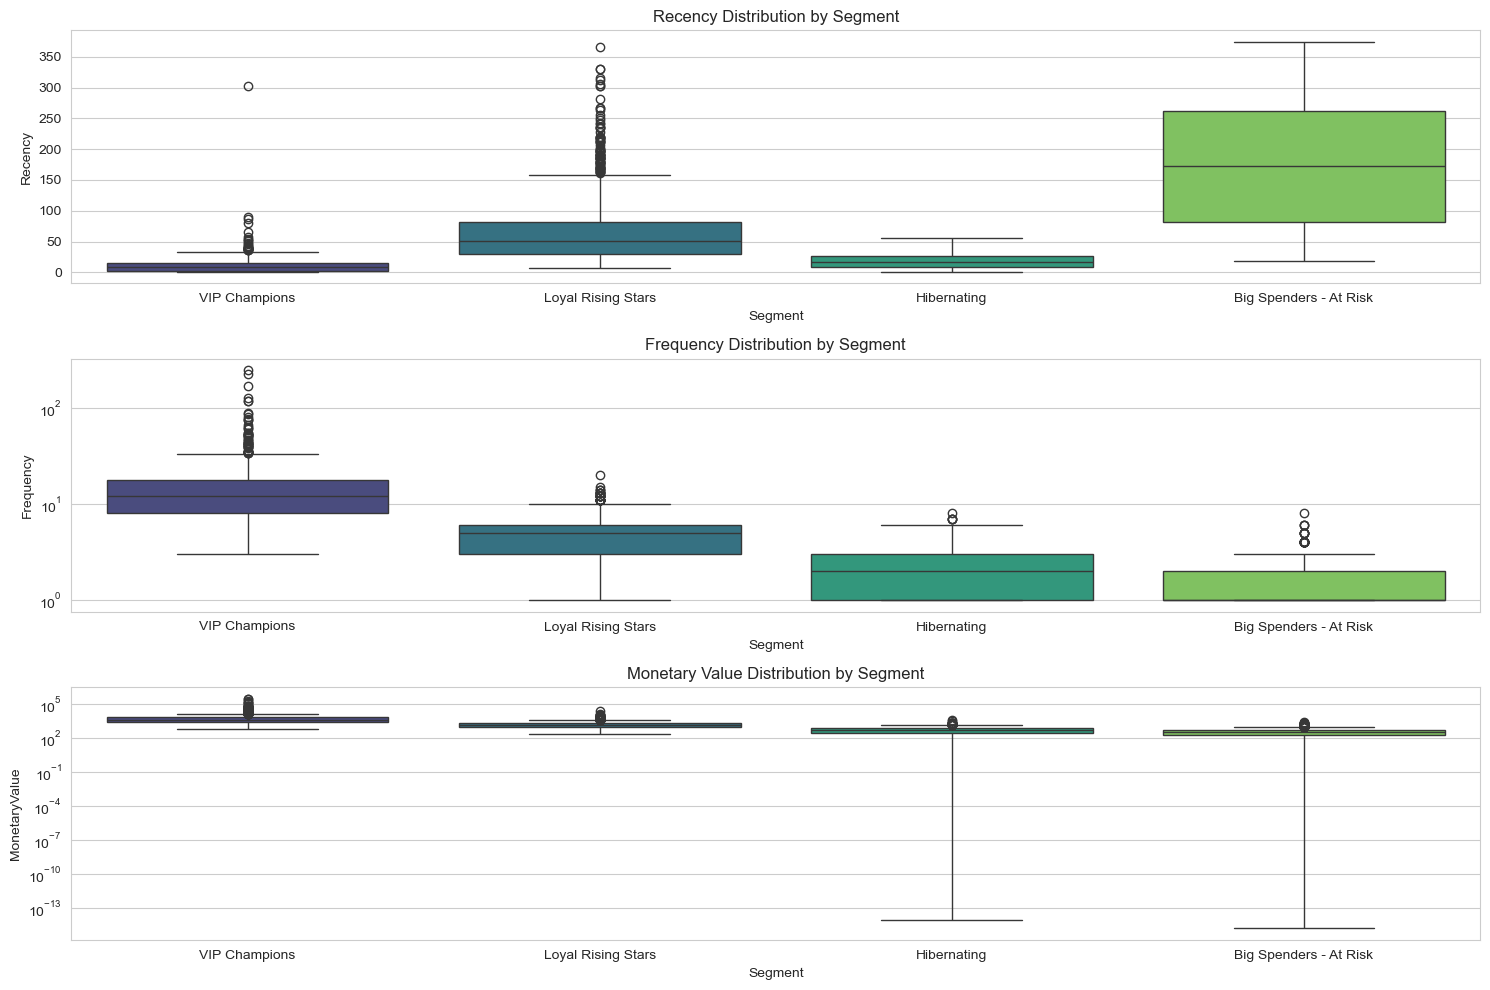

In [346]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='Segment', y='Recency', data=rfm, palette='viridis')
plt.title('Recency Distribution by Segment')

plt.subplot(3, 1, 2)
sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='viridis')
plt.title('Frequency Distribution by Segment')
plt.yscale('log') # Frequency has high outliers

plt.subplot(3, 1, 3)
sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='viridis')
plt.title('Monetary Value Distribution by Segment')
plt.yscale('log') # Monetary has high outliers

plt.tight_layout()
plt.savefig('segment_boxplots.png')

### Bar chart for means

In [347]:
profile_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'MonetaryValue']].mean().reset_index()
profile_melted = profile_means.melt(id_vars='Segment', var_name='Metric', value_name='Average Value')

## Separate plots for different scales

C:\Windows\Temp\ipykernel_11548\3449950303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Recency', data=profile_means, ax=axes[0], palette='viridis')
C:\Windows\Temp\ipykernel_11548\3449950303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Frequency', data=profile_means, ax=axes[1], palette='viridis')
C:\Windows\Temp\ipykernel_11548\3449950303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='MonetaryValue', data=profile_means, ax=axes[2], palette='viridis')


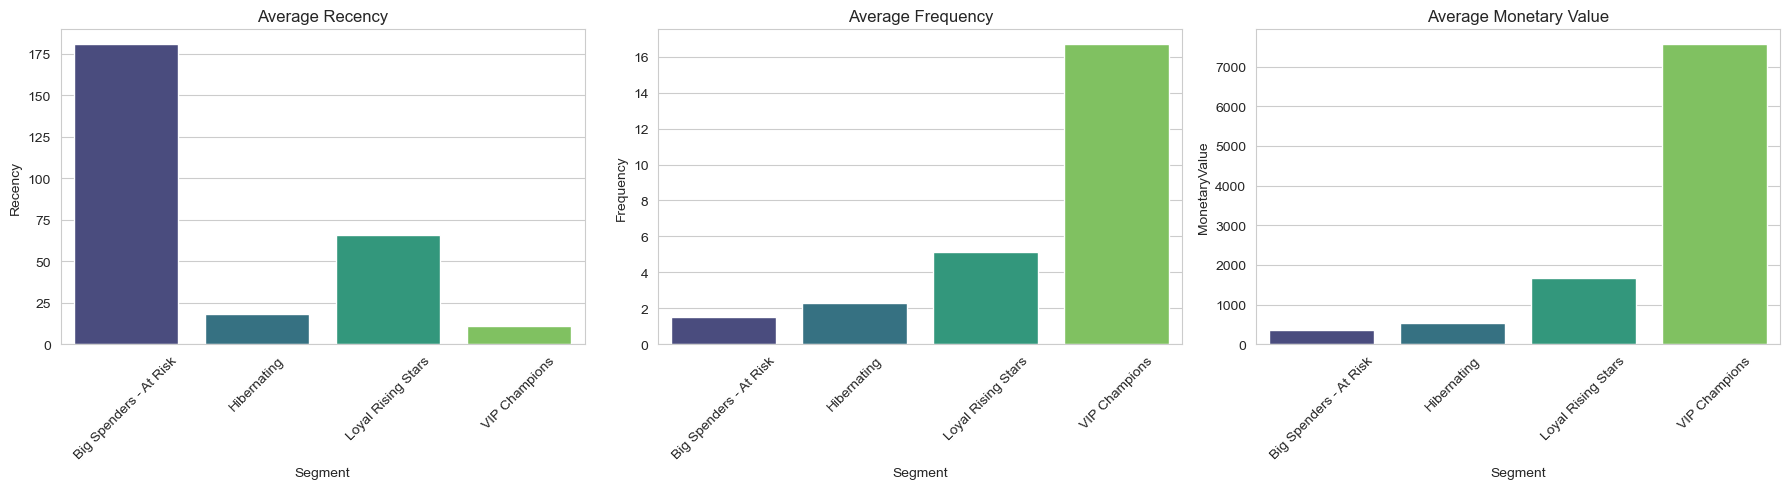

In [349]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Segment', y='Recency', data=profile_means, ax=axes[0], palette='viridis')
axes[0].set_title('Average Recency')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Segment', y='Frequency', data=profile_means, ax=axes[1], palette='viridis')
axes[1].set_title('Average Frequency')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Segment', y='MonetaryValue', data=profile_means, ax=axes[2], palette='viridis')
axes[2].set_title('Average Monetary Value')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('segment_bar_means.png')

#### Customer Segment Profiling Analysis

#### print(profile_summary)

#### # 1. Calculate and display Profiling Statistics

In [351]:
profile_stats = rfm.groupby('Segment').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'MonetaryValue': ['mean', 'median', 'std']
}).round(2)

print("Customer Segment Profiles (Summary Statistics):")
display(profile_stats)

Customer Segment Profiles (Summary Statistics):


Recency               Frequency                \
                          mean median    std      mean median    std   
Segment                                                                
Big Spenders - At Risk  180.65  173.0  99.57      1.51    1.0   0.79   
Hibernating              18.39   17.0  12.54      2.32    2.0   1.22   
Loyal Rising Stars       65.66   51.0  53.82      5.11    5.0   2.31   
VIP Champions            10.73    8.0  15.47     16.68   12.0  18.72   

                       MonetaryValue                     
                                mean   median       std  
Segment                                                  
Big Spenders - At Risk        351.22   294.65    270.81  
Hibernating                   528.20   454.17    365.11  
Loyal Rising Stars           1682.04  1341.65   1338.92  
VIP Champions                7557.73  3614.02  19285.14

##### 2. Visualize Distributions using Boxplots

C:\Windows\Temp\ipykernel_11548\163107563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Recency', data=rfm, palette='viridis')
C:\Windows\Temp\ipykernel_11548\163107563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='viridis')
C:\Windows\Temp\ipykernel_11548\163107563.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='viridis')


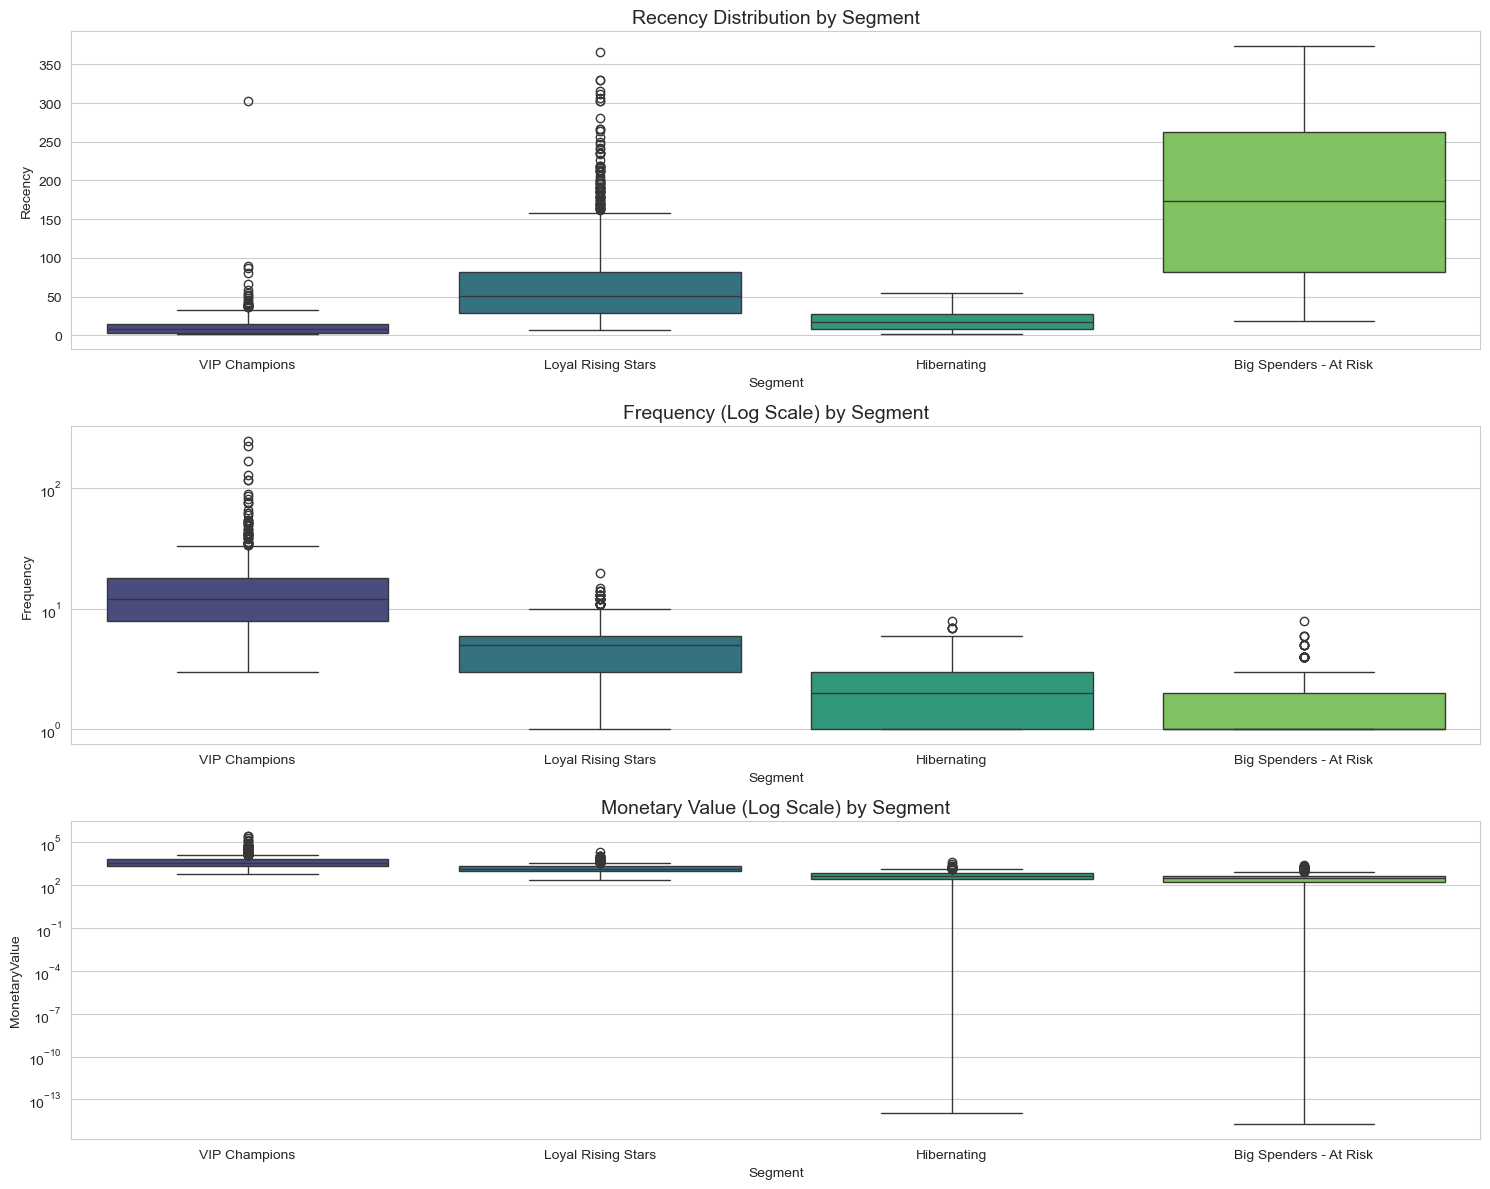

In [352]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.boxplot(x='Segment', y='Recency', data=rfm, palette='viridis')
plt.title('Recency Distribution by Segment', fontsize=14)

plt.subplot(3, 1, 2)
sns.boxplot(x='Segment', y='Frequency', data=rfm, palette='viridis')
plt.yscale('log') # Log scale helps see frequency differences clearly
plt.title('Frequency (Log Scale) by Segment', fontsize=14)

plt.subplot(3, 1, 3)
sns.boxplot(x='Segment', y='MonetaryValue', data=rfm, palette='viridis')
plt.yscale('log') # Log scale helps see spend differences clearly
plt.title('Monetary Value (Log Scale) by Segment', fontsize=14)

plt.tight_layout()
plt.show()

#### 3. Compare Averages using Bar Charts

C:\Windows\Temp\ipykernel_11548\818028678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Recency', data=profile_means, ax=axes[0], palette='magma')
C:\Windows\Temp\ipykernel_11548\818028678.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Frequency', data=profile_means, ax=axes[1], palette='magma')
C:\Windows\Temp\ipykernel_11548\818028678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='MonetaryValue', data=profile_means, ax=axes[2], palette='magma')


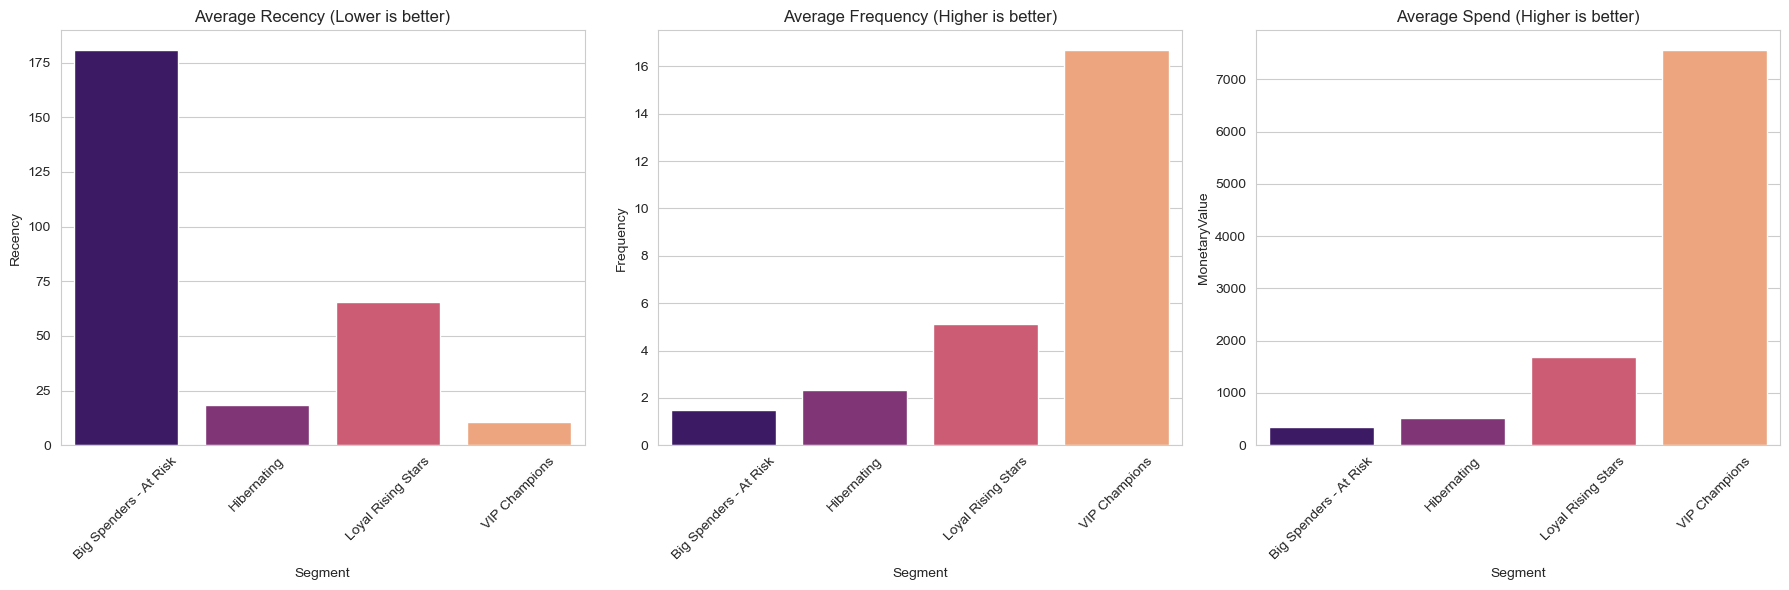

In [356]:
profile_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'MonetaryValue']].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Segment', y='Recency', data=profile_means, ax=axes[0], palette='magma')
axes[0].set_title('Average Recency (Lower is better)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Segment', y='Frequency', data=profile_means, ax=axes[1], palette='magma')
axes[1].set_title('Average Frequency (Higher is better)')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Segment', y='MonetaryValue', data=profile_means, ax=axes[2], palette='magma')
axes[2].set_title('Average Spend (Higher is better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()